# Решение нелинейных алгебраических уравнений

In [48]:
import sys
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

Зададим функцию

In [70]:
def f(x):
    y = 3*(x**2) - x - np.sin(x)
    return y    

In [71]:
def df(x):
    y = -1 - np.cos(x) + 6*x
    return y

In [72]:
a = 0
b = 2
n = 1001

# Метод грубой силы

Алгоритм грубой силы должен проходить через все точки кривой и проверьте, находится ли одна точка ниже оси x, и если следующая точка выше ось x или наоборот. Если это будет так, мы получим, что значение f(x) должно быть равным нулю между этими двумя точками x.

In [73]:
def brute_force_root_finder(f, a, b, n):    
    x = np.linspace(a, b, n)
    y = f(x)
    
    roots = []

    for i in range(n-1):
        if y[i] * y[i+1] < 0:
            root = x[i] - (x[i+1] - x[i]) / (y[i+1] - y[i]) * y[i]
            roots.append(root)

    return np.array(roots)

In [74]:
roots = brute_force_root_finder(f, a, b, n)
print(roots)

[0.64409225]


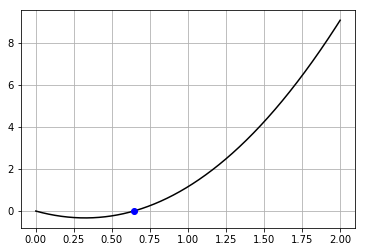

In [75]:
x = np.linspace(a, b, n)
y = f(x)

y0 = f(roots)

plt.plot(x, y, '-k', roots, y0, 'ob')

plt.grid(True)
plt.show()

минимумы:  [0.4]
максимумы:  [-200.]


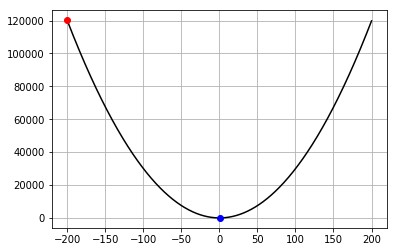

In [87]:
def brute_force_optimizer(f, a, b, n):
    x = np.linspace(a, b, n)
    y = f(x)
    
    # поиск локальных экстремумов
    minima = []
    maxima = []

    for i in range(n-1):
        if y[i-1] < y[i] > y[i+1]:
            maxima.append(i)
        
        if y[i-1] > y[i] < y[i+1]:
            minima.append(i)
        
    # найдем глобальный максимум и минимум на интервале (a,b)    
    y_max_inner = max([y[i] for i in maxima])
    y_min_inner = min([y[i] for i in minima])

    # сравним со значениями функции на границах отрезка [a,b]
    
    if y[0] > y_max_inner:
        maxima.append(0)

    if y[len(x)-1] > y_max_inner:
        maxima.append(len(x)-1)

    if y[0] < y_min_inner:
        minima.append(0)

    if y[len(x)-1] < y_min_inner:
        minima.append(len(x)-1)

    x_min = [x[i] for i in minima]
    x_max = [x[i] for i in maxima]
    
    return np.array(x_min), np.array(x_max)


x_min, x_max = brute_force_optimizer(f, -200, 200, n)
print('минимумы: ', x_min)
print('максимумы: ', x_max)

x = np.linspace(-200, 200, n)
y = f(x)

y_min = f(x_min)
y_max = f(x_max)

plt.plot(x, y, '-k', x_min, y_min, 'ob', x_max, y_max, 'or')

plt.grid(True)
plt.show()

# Метод Ньютона

Основная идея метода Ньютона состоит в том, чтобы аппроксимировать исходную функцию f(x) прямой линией, т.е. заменить линейной функцией, так как легко решить линейное уравнение.
Метод Ньютона, в качестве линейной функции выбирает касательную к f(x).

In [57]:
def newton(f, df, x, eps, max_iterations=100):
    f_value = f(x)
    iteration_counter = 0

    while abs(f_value) > eps and iteration_counter < max_iterations:
        try:
            x = x - float(f_value) / df(x)
        except ZeroDivisionError:
            print('Error! - derivative zero for x = ', x) # не обращалась в ноль
            sys.exit(1)

        f_value = f(x)
        iteration_counter += 1 # счетчик итерации, чтобы не было больше 100        
    return x

In [58]:
root = newton(f, df, 1.0, 1.0e-6, 100)
print(root)

0.6440925937482385


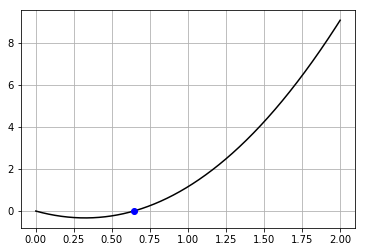

In [59]:
x = np.linspace(a, b, n)
y = f(x)

plt.plot(x, y, '-k', root, f(root), 'ob')

plt.grid(True)
plt.show()

# Метод секущих 

Идея секулярного метода состоит в том, чтобы думать, как в методе Ньютона, но вместо того,
чтобы использовать f'(xn), мы аппроксимируем эту производную секущей.

In [60]:
def secant(f, x0, x1, eps, max_iterations=100):
    f_x0 = f(x0)
    f_x1 = f(x1)
    
    iteration_counter = 0

    while abs(f_x1) > eps and iteration_counter < max_iterations:
        try:
            denominator = float(f_x1 - f_x0) / (x1 - x0)
            x = x1 - float(f_x1) / denominator
        except ZeroDivisionError:
            print('Error! - denominator zero for x = ', x)
            sys.exit(1)
        
        x0 = x1
        x1 = x

        f_x0 = f_x1
        f_x1 = f(x1)

        iteration_counter += 1

    return x

In [61]:
x0 = 1000
x1 = x0 - 1

root= secant(f, x0, x1, eps=1.0e-6)
print(root)

0.6440925329392885


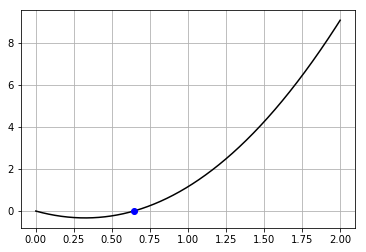

In [62]:
x = np.linspace(a, b, 1000)
y = f(x)

plt.plot(x, y, '-k', root, f(root), 'ob')

plt.grid(True)
plt.show()

# Метод бисекции

Идея метода заключается во первых, что рассматривается непрерывная функция на интервале и значения функции на концах интервала имеет противоположные знаки. Во вторых - ключевая идея -это разделение интервала на два равных интервала, один слева и один справа от середины интервала. Оценив знак в серединной точке, мы узнаем сразу решение должно существовать слева или справа от середины интервала или мы уже нашли корень (если значение функции обратилось в ноль).

In [63]:
def bisection(f, x_L, x_R, eps):
    f_L = f(x_L)

    if f_L * f(x_R) > 0:
        print('Функция на концах интервала одного знака')
        sys.exit(1)

    x_M = float(x_L + x_R)/2.0
    f_M = f(x_M)

    while abs(f_M) > eps:
        if f_L * f_M > 0:
            x_L = x_M
            f_L = f_M
        else:
            x_R = x_M
        
        x_M = float(x_L + x_R) / 2
        f_M = f(x_M)
    
    return x_M

In [66]:
root= bisection(f, 0, 1000, eps=1.0e-6)
print(root)

4.6566128730773926e-07


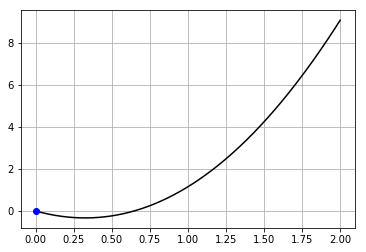

In [67]:
x = np.linspace(a, b, 1000)
y = f(x)

plt.plot(x, y, '-k', root, f(root), 'ob')

plt.grid(True)
plt.show()